In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
#read drifter data
def read_Mseries_data(path):
    column_names = ['Time','PL','PR','EX [deg]','EY [deg]','EZ [deg]',
               'xx1','xx2','xx3','yy1','yy2','yy3','yy4']
    indices = [0,1,3,5,6,7,8,9,10,11,12,13,14]
    df = pd.read_csv(path, header = 0, names = column_names, usecols = indices)
    return df 



# Investigate the data taken together with the drone flight
15.07 2021 A drone was used to follow drifter M09 at 12:59.
Filneme for this deployment: M090715104232.txt

In [13]:
#Load data
M09_drone = read_Mseries_data('data/M091507/M090715104232.txt')
#remove extreme outliers
M09_drone.drop(M09_drone[abs(M09_drone.PR) > 20000].index, inplace = True)
M09_drone

,Time,PL,PR,EX [deg],EY [deg],EZ [deg],xx1,xx2,xx3,yy1,yy2,yy3,yy4
0,42856,1005.1,999.6,4.6268,-1.1205,-8.3174,-0.1,0.7,0.1,-345.3,77.1,89.1,-6.22
1,42876,1004.8,999.6,4.6364,-1.1456,-8.3414,0.0,0.6,0.1,-362.1,69.9,85.5,-2.87
2,42896,1005.1,1000.3,4.6196,-1.1229,-8.3270,-0.0,0.5,0.1,-338.1,91.5,89.1,-6.22
3,42916,1005.3,1000.5,4.6519,-1.1265,-8.3402,0.0,0.6,0.2,-352.5,74.7,93.9,-0.48
4,42936,1005.6,1000.7,4.6316,-1.1360,-8.3150,0.1,0.6,0.1,-352.5,81.9,93.9,-7.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74503,1532916,995.2,996.8,-9.4355,-1.0618,-3.2992,0.0,0.6,0.0,48.3,132.3,39.3,-1.92
74504,1532936,995.3,996.8,-9.4283,-1.0582,-3.2980,0.1,0.6,0.2,60.3,144.3,40.5,-4.79
74505,1532956,994.8,997.0,-9.4451,-1.0702,-3.2836,0.0,0.6,0.1,41.1,149.1,44.7,-4.31
74506,1532976,995.9,997.8,-9.4535,-1.0582,-3.2956,-0.0,0.5,0.1,29.1,163.5,36.3,-8.14


# Data processing
Use a rolling median filter to smooth out noizy data

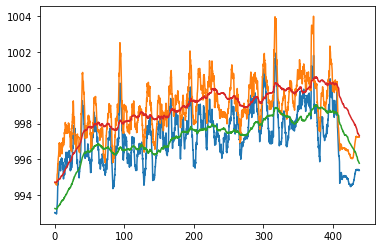

In [80]:
start_n = 49800
end_n = 71700
n = int((end_n-start_n)/7)
M09_P_mean = M09_drone[["PL","PR"]].rolling(200).mean()
heavy_p_mean = M09_drone[["PL","PR"]].rolling(2000).mean()
time_s = np.linspace(0,end_n-start_n,end_n-start_n)/50#convert to seconds



def plot_pressure_sections(sec):

    plt.figure(figsize = (15,4))
    plt.plot(time_s[(sec-1)*n:sec*n],M09_P_mean.PL[(start_n + n*(sec-1)):(start_n+n*sec)],label = 'PL')
    plt.plot(time_s[(sec-1)*n:sec*n],M09_P_mean.PR[(start_n + n*(sec-1)):(start_n+n*sec)],label = 'PR')

    plt.xlabel('Time [s]')
    plt.ylabel('Pressure [hPa]' )
    plt.legend()
    plt.show()
#plot_pressure_sections(1)
#plot_pressure_sections(2)
#plot_pressure_sections(3)
#plot_pressure_sections(4)
#plot_pressure_sections(5)
#plot_pressure_sections(6)
#plot_pressure_sections(7)


plt.plot(time_s,M09_P_mean.PL[start_n:end_n],label = 'PL')
plt.plot(time_s,M09_P_mean.PR[start_n:end_n],label = 'PR')
plt.plot(time_s,heavy_p_mean.PL[start_n:end_n],label = 'PL')
plt.plot(time_s,heavy_p_mean.PR[start_n:end_n],label = 'PR')


In [35]:
print((M09_drone2['Time'][32500]-M09_drone2['Time'][13200])/50/60*0.1/2)
print((M09_drone['Time'][end_n]-M09_drone['Time'][start_n])/50/60*0.1/2)
print((33000-13000)/50/60*2)

6.433333333333334
7.300000000000001
13.333333333333334
